In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

**Wigner's Friend**

To avoid the paradoxes that observation causes,we can think of all observers to exist in their own bubbles.

Wigner's friend is a thought experiment of the measurement problem in quantum mechanics.
Wigner imagined that his friend observed a quantum system in superposition of two states.

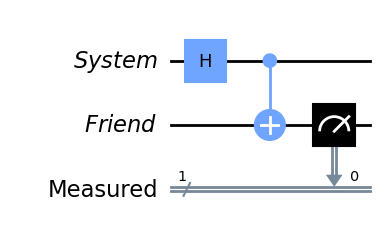

In [3]:
qr1=QuantumRegister(1,name="System")
qr2=QuantumRegister(1,name="Friend")
cr1=ClassicalRegister(1,name="Measured")
qc=QuantumCircuit(qr1,qr2,cr1)
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)# represents the measurement made by weigner's friend
qc.draw('mpl')

In [4]:
from qiskit_aer import AerSimulator
simulator=AerSimulator()
result=simulator.run(qc).result()
print("Measurements by wigner's Friends:",result.get_counts())# almost equals

Measurements by wigner's Friends: {'0': 513, '1': 511}


Since Wigner was isolated from this incident up, until now for him his friend and the qubit were still in a superposition. Upon hearing the result, Wigner declares that his measurement has projected him and his friend in the resultant state. Therefore we need a qubit for wigner as weel. 

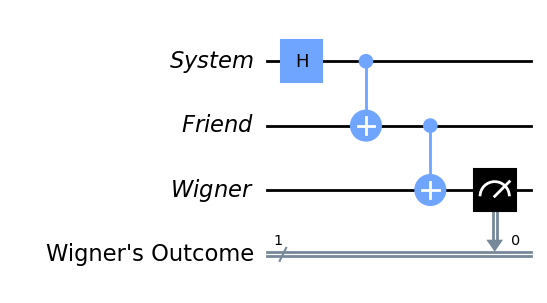

In [6]:
qr3=QuantumRegister(1,name="Wigner")
cr2=ClassicalRegister(1,name="Wigner's Outcome")
qc2=QuantumCircuit(qr1,qr2,qr3,cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.measure(2,0)
qc2.draw()

But this is the point where we have a contradiction. Where exactly did the collapse occur?
From friend's POV it occured when he measured the qubit, while from Wigner's POV it occured when he measured is friend's outcome.

**Friend's POV**

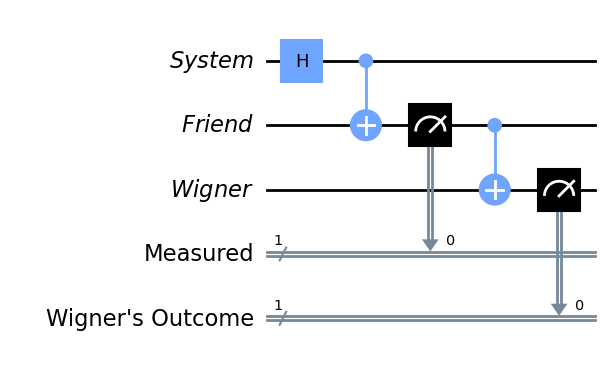

In [7]:
qc3=QuantumCircuit(qr1,qr2,qr3,cr1,cr2)
qc3.h(0)
qc3.cx(0,1)
qc3.measure(1,0)
qc3.cx(1,2)
qc3.measure(2,1)

qc3.draw()

**From Wigner's Perspective**

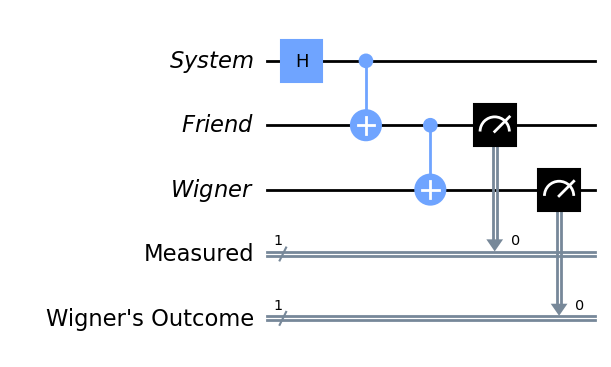

In [8]:
qc4=QuantumCircuit(qr1,qr2,qr3,cr1,cr2)
qc4.h(0)
qc4.cx(0,1)

qc4.cx(1,2)
qc4.measure(1,0)
qc4.measure(2,1)

qc4.draw()

Therefore there is confusion whether the collapse happens before second CNOT in Wigner's Friend's Circuit or after it as in Wigner's.

This is the Measurement problem of Quantum Mechanics. The conventional answer to this is the Copenhagen Interpretation which says that observation of quantum state makes it irreversibly collapse into a single state 

As we can see the Copenhagen Interpretation does not give us any final answer in this problem. One way to resolve this is to remove the irreversible measurements altogether.

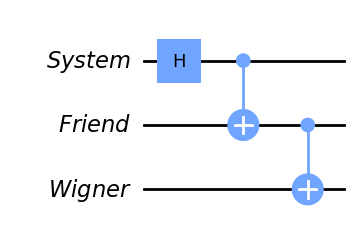

In [10]:
# The circuit after removing this is:(We are treating all measurements as entangled )
qc5=QuantumCircuit(qr1,qr2,qr3)
qc5.h(0)
qc5.cx(0,1)

qc5.cx(1,2)
qc5.draw()